<h2>1. Data collection </h2>


In [ ]:
#download product listings
!gdown --fuzzy "https://drive.google.com/file/d/1yfoLIk465Y_Qm-lWiHQIsT_4p5pYT1qd/view?usp=drive_link"
!tar -xf /content/abo-listings.tar -C /content/

Downloading...
From: https://drive.google.com/uc?id=1yfoLIk465Y_Qm-lWiHQIsT_4p5pYT1qd
To: /content/abo-listings.tar
100% 87.5M/87.5M [00:01<00:00, 54.4MB/s]


In [ ]:
#download product images
!gdown --fuzzy "https://drive.google.com/file/d/12GGA49AQCxFTuhioHGjLm49ylX211t50/view?usp=drive_link"
!tar -xf /content/abo-images-small.tar -C /content/

Downloading...
From (original): https://drive.google.com/uc?id=12GGA49AQCxFTuhioHGjLm49ylX211t50
From (redirected): https://drive.google.com/uc?id=12GGA49AQCxFTuhioHGjLm49ylX211t50&confirm=t&uuid=9d83b46f-d520-44ac-afd1-8c4c94d16eea
To: /content/abo-images-small.tar
100% 3.25G/3.25G [00:49<00:00, 66.3MB/s]


<h2>2. Preprocessing Data </h2>

<h4> 2.a. Product Listings </h4>

In [ ]:
#read product listings
import pandas as pd
import glob

pd.set_option('display.max_colwidth', None)
metadata_files = sorted(glob.glob('/content/listings/metadata/listings_*.json.gz'))

dfs = []

for path in metadata_files:
    print(f"Reading {path} ...")
    df_part = pd.read_json(path, lines=True, compression='gzip')
    dfs.append(df_part)

# Combine all into one DataFrame
df = pd.concat(dfs, ignore_index=True)
print("Combined dataset shape:", df.shape)


Reading /content/listings/metadata/listings_0.json.gz ...
Reading /content/listings/metadata/listings_1.json.gz ...
Reading /content/listings/metadata/listings_2.json.gz ...
Reading /content/listings/metadata/listings_3.json.gz ...
Reading /content/listings/metadata/listings_4.json.gz ...
Reading /content/listings/metadata/listings_5.json.gz ...
Reading /content/listings/metadata/listings_6.json.gz ...
Reading /content/listings/metadata/listings_7.json.gz ...
Reading /content/listings/metadata/listings_8.json.gz ...
Reading /content/listings/metadata/listings_9.json.gz ...
Reading /content/listings/metadata/listings_a.json.gz ...
Reading /content/listings/metadata/listings_b.json.gz ...
Reading /content/listings/metadata/listings_c.json.gz ...
Reading /content/listings/metadata/listings_d.json.gz ...
Reading /content/listings/metadata/listings_e.json.gz ...
Reading /content/listings/metadata/listings_f.json.gz ...
Combined dataset shape: (147702, 28)


In [ ]:
df.head()

,brand,bullet_point,color,item_id,item_name,model_name,model_number,model_year,product_type,style,...,item_weight,material,fabric_type,color_code,product_description,spin_id,3dmodel_id,pattern,finish_type,item_shape
0,"[{'language_tag': 'nl_NL', 'value': 'find.'}]","[{'language_tag': 'nl_NL', 'value': 'Schoen in Loafer-stijl'}, {'language_tag': 'nl_NL', 'value': 'Platform hak'}, {'language_tag': 'nl_NL', 'value': 'Cap teen'}, {'language_tag': 'nl_NL', 'value': 'Middenhak'}]","[{'language_tag': 'nl_NL', 'value': 'Veelkleurig Vrouw Blauw'}]",B06X9STHNG,"[{'language_tag': 'nl_NL', 'value': 'Amazon-merk - vinden. Dames Leder Gesloten Teen Hakken,Veelkleurig Vrouw Blauw,5 UK'}]","[{'language_tag': 'nl_NL', 'value': '37753'}]",[{'value': '12-05-04'}],[{'value': 2017}],[{'value': 'SHOES'}],"[{'language_tag': 'nl_NL', 'value': 'Gesloten-teen pompen'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'language_tag': 'es_MX', 'value': 'AmazonBasics'}]","[{'language_tag': 'es_MX', 'value': 'White Powder Coat Finish'}, {'language_tag': 'es_MX', 'value': '55-Lbs max weight capacity'}, {'language_tag': 'es_MX', 'value': 'Length: 22-inch (550mm)'}, {'language_tag': 'es_MX', 'value': 'Set includes 10 pair of slides; enough for 10 drawers'}, {'language_tag': 'es_MX', 'value': 'Mounting hardware and installation instructions included'}]","[{'language_tag': 'es_MX', 'value': 'White Powder Coat'}]",B07P8ML82R,"[{'language_tag': 'es_MX', 'value': '22"" Bottom Mount Drawer Slides, White Powder Coat, 10 Pairs'}]",NaN,[{'value': 'AB5013-R22-10'}],NaN,[{'value': 'HARDWARE'}],"[{'language_tag': 'es_MX', 'value': '10 pares'}]",...,"[{'normalized_value': {'unit': 'pounds', 'value': 1.45}, 'unit': 'pounds', 'value': 1.45}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'language_tag': 'en_AE', 'value': 'AmazonBasics'}]","[{'language_tag': 'en_AE', 'value': '3D printer filament with 1.75mm diameter + / - .05mm; designed to fit most common 3D printers (check spool size for compatibility); Translucent Yellow; 1 kg spool'}, {'language_tag': 'en_AE', 'value': 'Made of PETG plastic, known for its ease of use (like PLA) and durable strength (like ABS); no heating bed needed; offers easy bed adhesion, stiffness, and a glossy finish'}, {'language_tag': 'en_AE', 'value': 'Spool's built-in gauge shows percentage of material remaining and approximate length remaining'}, {'language_tag': 'en_AE', 'value': 'Engineered to reduce jamming; resealable storage bag included to protect filament between use'}, {'language_tag': 'en_AE', 'value': 'Measures 9.2 by 8.3 by 3 inches (LxWxH); weighs 2.2 pounds; backed by an AmazonBasics 1-year limited warranty'}]","[{'language_tag': 'en_AE', 'value': 'Translucent Yellow'}]",B07H9GMYXS,"[{'language_tag': 'en_AE', 'value': 'AmazonBasics PETG 3D Printer Filament, 1.75mm, 1 kg Spool 1.75mm AMG10528516-10'}]",NaN,[{'value': 'AMG10528516-10'}],NaN,[{'value': 'MECHANICAL_COMPONENTS'}],"[{'language_tag': 'en_AE', 'value': '1-Pack'}]",...,"[{'normalized_value': {'unit': 'pounds', 'value': 2.2}, 'unit': 'pounds', 'value': 2.2}]","[{'language_tag': 'en_AE', 'value': 'PETG (Polyethylene Terephtalate Glycol-modified)'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'language_tag': 'en_GB', 'value': 'Stone & Beam'}]",NaN,"[{'language_tag': 'en_GB', 'value': 'Stone Brown'}]",B07CTPR73M,"[{'language_tag': 'en_GB', 'value': 'Stone & Beam Stone Brown Swatch, 25020039-01'}]",NaN,[{'value': '25020039-01'}],NaN,[{'value': 'SOFA'}],NaN,...,"[{'normalized_value': {'unit': 'pounds', 'value': 0.1}, 'unit': 'pounds', 'value': 0.1}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'language_tag': 'en_AU', 'value': 'The Fix'}]","[{'language_tag': 'en_AU', 'value': 'Embroidered flowers bloom against understated tan suede in this backless loafer with apron toe and cross strap.'}, {'language_tag': 'en_AU', 'value': 'Minimalist heel'}]","[{'language_tag': 'en_AU', 'standardized_values': ['Brown'], 'value': 'Havana Tan'}]",B01MTEI8M6,"[{'language_tag': 'en_AU', 'value': 'The Fix Amazo

In [ ]:
#show number of products in each product category
df['product_type'].value_counts()

,count
product_type,
[{'value': 'CELLULAR_PHONE_CASE'}],64853
[{'value': 'SHOES'}],12965
[{'value': 'GROCERY'}],6546
[{'value': 'HOME'}],5264
[{'value': 'HOME_BED_AND_BATH'}],3082
...,...
[{'value': 'SCULPTURE'}],1
[{'value': 'WAIST_CINCHER'}],1
[{'value': 'KICK_SCOOTER'}],1


In [ ]:
#Extract only products listed in english

english_tags = {'en_US', 'en_GB', 'en_CA', 'en_AE', 'en_IN', 'en_AU', 'en_SG'}

#function to extract products that only have english tags
def extract_english_only(lst):
    """Return ONLY the English-tagged entries as list of dicts."""
    if not isinstance(lst, list):
        return []
    return [
        d for d in lst
        if isinstance(d, dict) and d.get("language_tag") in english_tags
    ]

df_english = df.copy()

# Replace original fields with ENGLISH-ONLY versions
df_english["brand"] = df_english["brand"].apply(extract_english_only)
df_english["item_name"] = df_english["item_name"].apply(extract_english_only)
df_english["bullet_point"] = df_english["bullet_point"].apply(extract_english_only)
df_english["color"] = df_english["color"].apply(extract_english_only)
df_english["material"] = df_english["material"].apply(extract_english_only)
df_english["product_description"] = df_english["product_description"].apply(extract_english_only)
df_english["item_keywords"] = df_english["item_keywords"].apply(extract_english_only)

# Keep only rows where key metadata fields still contain at least one English entry.
df_english = df_english[
    (df_english["brand"].str.len() >0 ) &
    (df_english["item_name"].str.len() > 0) &
    (df_english["bullet_point"].str.len() > 0) &
    (df_english["color"].str.len() > 0)
    ]

In [ ]:

# The original 'product_type' field is a list of dictionaries
# We take the first entry's 'value' as the standard category
df_english['product_type_clean'] = df_english['product_type'].apply(
    lambda x: x[0]['value'] if isinstance(x, list) and len(x) > 0 else None
)

# # filter the data by product_type to get subset of data for later fine-tuning
df_text = df_english[
    (df_english['product_type_clean'].isin([
    "HOME",
    "CHAIR",
    "HOME_FURNITURE_AND_DECOR",
    "SOFA",
    "HOME_BED_AND_BATH",
    "RUG",
    "FINENECKLACEBRACELETANKLET",
    "HANDBAG",
    "FINERING",
    "BOOT",
    "TABLE",
    "FINEEARRING",
    "WALL_ART",
    "SANDAL",
    "LIGHT_FIXTURE"
]))
    ].copy()


In [ ]:
df = df_text.dropna(subset=['main_image_id', 'item_name']).copy()
df.shape

(11229, 29)

In [ ]:
import re

#extract text from the product listings
def extract_text(values):
    if isinstance(values, list):
        out = []
        for v in values:
            # Extract actual string value
            if isinstance(v, dict) and 'value' in v and isinstance(v['value'], str):
                val = v['value'].strip()
            elif isinstance(v, str):
                val = v.strip()
            else:
                continue
            # Avoid duplicates
            if val and val not in out:
                out.append(val)
        return ', '.join(out) if out else None

    elif isinstance(values, str):
        return values.strip()

    return None

#clean syntax
def clean_text(name):
    if not isinstance(name, str):
        return ""
    name = name.replace("_", " ").replace("-", " ")
    name = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', name)
    name = name.lower().strip()
    name = re.sub(r'\s+', ' ', name)
    return name

# apply text extraction and cleaning syntax
df['item_name_text'] = df['item_name'].apply(extract_text).apply(clean_text)
df['color_text'] = df['color'].apply(extract_text).apply(clean_text)
df['product_type_text'] = df['product_type'].apply(extract_text).apply(clean_text)
df['bullet_point_text'] = df['bullet_point'].apply(extract_text).apply(clean_text)
df['material_text'] = df['material'].apply(extract_text).apply(clean_text)
df['product_description_text'] = df['product_description'].apply(extract_text).apply(clean_text)
df['brand_text'] = df['brand'].apply(extract_text).apply(clean_text)
df['item_keywords_text'] = df['item_keywords'].apply(extract_text).apply(clean_text)

# concatenate all the 8 key fields into a single caption
df['full_text'] = (
    df['item_name_text'].fillna('') +
    ', ' + df['brand_text'].fillna('') +
    ', ' + df['product_type_text'].fillna('') +
    ', ' + df['bullet_point_text'].fillna('') +
    ', ' + df['color_text'].fillna('') +
    ', ' + df['material_text'].fillna('') +
    ', ' + df['product_description_text'].fillna('') +
    ', ' + df['item_keywords_text'].fillna('') +
    '. '
)

# Clean up formatting
df['full_text'] = (
    df['full_text']
      .str.replace(r'\s+', ' ', regex=True)
      .str.replace(r'\.\s*\.', '.', regex=True)
      .replace('nan', '', regex=True)
      .str.strip()
)

In [ ]:
# show example of what new product caption looks like
df['full_text'].head()

,full_text
103,"amazon brand – rivet bristol natural edge black metal side table, walnut, rivet, table, with a wood top and metal 3 legged stand, this table is modern yet classic. the wood top is a ""natural edge"" cut. no two tables are exactly alike; allow for some height variation. this table is a handy landing spot for keys, phones and small table lamps., 18.9""l x 18.9""w x 18.2""h, engineered wood with walnut veneer; metal stand bottom, modern yet classic, convenient side table for living room or bedroom, simple assembly in 15 30 minutes, free returns for 30 days. 1 year warranty., brown, metal, , end tables, end tables, side table, end table, end tables living room, night stand, console table, accent table, coffee table, sofa table, nightstand, rivet, mid century, modern, brown, bedside table, side tables for small spaces, side tables living room, white side table, round side table, gold side table, black side table, chairside table, side table for bedroom."
111,"yellow gold plated sterling silver princess cut solitaire ring made with swarovski zirconia (2 cttw), size 8, amazon collection, finering, princess brilliant cut ring set with swarovski zirconia (2 cttw), secured with 4 prongs, yellow gold plated sterling silver band, size 8, must have piece for everyone's jewelry box, each swarovski zirconia is laser engraved as a seal of authenticity and guarantees the highest quality diamond simulant in the world, imported, these silver pieces are built for longevity. this piece features a metal plating or flashing, or an electrocoating for a more lustrous appearance, but it can wear off with long term or heavy use. to ensure the longevity of your plated items store your jewelry in a dark, cool, dry place such as a pouch or air tight box and avoid rubbing plated items together. also try to avoid exposure to cleaning products and perfume which can both negatively affect your items. your local jeweler can advise you where to send your jewelry if you would ever like them replated., yellow gold plated silver, , , classics."
122,"amazon basics leather soft kids/youth recliner with armrest storage, 5+ age group, light blue, amazon basics, chair, kid’s/youth reclining chair appropriate for ages 5 and up; 90 pound weight capacity, smooth leather soft upholstery offers durability and comfort; wipe clean with a damp cloth, ca117 fire retardant foam filling for children's safety; plush padding for extra comfort, solid hardwood frame and raised plastic feet for enhanced sturdiness, armrest storage compartment for books, video game controllers, remotes, and more, light blue, leather, , bed, small, rocker, gliding, toddlers, pink, swivel, gliders, playroom, kid, rocking, seater, marshmallow, couch, marshmello, throne, boys, nursing, glider, girls, couches, ottomans, gray, furniture, rae, chairs, linen, recliners, dorel, arm, kids, ann, registry, viv, living, relax, ottoman, &, da6942, room, nursery, baby, mikayla."
146,"amazon brand find. albert, men’s chelsea boots chelsea boots, black (black), us 12, find., boot, built wooden sole, imitation suede leather uppers, rounded toe, order a size above your usual size, black, , , men' leather ; for men."
158,"amazon brand – rivet eva mid century modern tufted velvet down filled sectional sofa couch, 87""w, navy, rivet, sofa, bring stunning, mid century elegance to your living room with this hand tufted sofa featuring luxurious velvet upholstery. the plush down filled bench cushion is removable and reversible and is held in place by clips at the corners., 87""w x 35.25''d x 30.25''h, durable polyester velvet on hardwood frame and brushed brass legs, modern elegant style with reversible cushion to extend the life of the piece, simple assembly in 15 minutes or less. vacuum or wipe with a soft, dry cloth., free returns for 30 days. 1 year warranty., navy, velvet, hardwood frame, metal legs, , sofas, sectional sofa, couch, sofa, accent chair, recliner chair, loveseat, sleeper sofa, sofa sets for liv

<h4> 2.b. Product Images </h4>

In [ ]:
# read metadata of product images
import pandas as pd

df_image = pd.read_csv('/content/images/metadata/images.csv.gz', compression='gzip')
df_image.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [ ]:
# organize image data

# create full pathh of product images
df_image['full_path'] = '/content/images/small/' + df_image['path']

# Ensure main_image_id is always a list for consistent processing
df['main_image_id'] = df['main_image_id'].apply(
    lambda x: x if isinstance(x, list) else [x]
)

# Expand each product row to one row per associated image
df_main = df.explode('main_image_id').rename(columns={'main_image_id': 'image_id'})

# Merge product-image mappings with image metadata
df_merged = df_main.merge(df_image[['image_id', 'full_path', 'height', 'width']],
                              on='image_id', how='inner')


In [ ]:
#merge text data with image data
df_final = df_merged[['item_id', 'image_id','product_type_text', 'full_path', 'full_text']]
df_final = df_final.dropna(subset=['full_path', 'full_text'])


In [ ]:
#drop duplicate rows
df_final = df_final.drop_duplicates(subset=["item_id", "image_id"], keep="first")

#show final dimension of the refined dataset
df_final.shape

#show the first few rows
df_final.head()

,item_id,image_id,product_type_text,full_path,full_text
0,B072ZLCB3M,81Xh+yZvD1L,table,/content/images/small/d9/d93b23d1.jpg,"amazon brand – rivet bristol natural edge black metal side table, walnut, rivet, table, with a wood top and metal 3 legged stand, this table is modern yet classic. the wood top is a ""natural edge"" cut. no two tables are exactly alike; allow for some height variation. this table is a handy landing spot for keys, phones and small table lamps., 18.9""l x 18.9""w x 18.2""h, engineered wood with walnut veneer; metal stand bottom, modern yet classic, convenient side table for living room or bedroom, simple assembly in 15 30 minutes, free returns for 30 days. 1 year warranty., brown, metal, , end tables, end tables, side table, end table, end tables living room, night stand, console table, accent table, coffee table, sofa table, nightstand, rivet, mid century, modern, brown, bedside table, side tables for small spaces, side tables living room, white side table, round side table, gold side table, black side table, chairside table, side table for bedroom."
1,B01N26F2NT,71CH0VV1cWL,finering,/content/images/small/c4/c403f169.jpg,"yellow gold plated sterling silver princess cut solitaire ring made with swarovski zirconia (2 cttw), size 8, amazon collection, finering, princess brilliant cut ring set with swarovski zirconia (2 cttw), secured with 4 prongs, yellow gold plated sterling silver band, size 8, must have piece for everyone's jewelry box, each swarovski zirconia is laser engraved as a seal of authenticity and guarantees the highest quality diamond simulant in the world, imported, these silver pieces are built for longevity. this piece features a metal plating or flashing, or an electrocoating for a more lustrous appearance, but it can wear off with long term or heavy use. to ensure the longevity of your plated items store your jewelry in a dark, cool, dry place such as a pouch or air tight box and avoid rubbing plated items together. also try to avoid exposure to cleaning products and perfume which can both negatively affect your items. your local jeweler can advise you where to send your jewelry if you would ever like them replated., yellow gold plated silver, , , classics."
2,B07TMH6289,71T+bO0FkKL,chair,/content/images/small/7c/7c530bb1.jpg,"amazon basics leather soft kids/youth recliner with armrest storage, 5+ age group, light blue, amazon basics, chair, kid’s/youth reclining chair appropriate for ages 5 and up; 90 pound weight capacity, smooth leather soft upholstery offers durability and comfort; wipe clean with a damp cloth, ca117 fire retardant foam filling for children's safety; plush padding for extra comfort, solid hardwood frame and raised plastic feet for enhanced sturdiness, armrest storage compartment for books, video game controllers, remotes, and more, light blue, leather, , bed, small, rocker, gliding, toddlers, pink, swivel, gliders, playroom, kid, rocking, seater, marshmallow, couch, marshmello, throne, boys, nursing, glider, girls, couches, ottomans, gray, furniture, rae, chairs, linen, recliners, dorel, arm, kids, ann, registry, viv, living, relax, ottoman, &, da6942, room, nursery, baby, mikayla."
3,B06XCPVVPS,71KwV3JHT9L,boot,/content/images/small/ff/ffb123bf.jpg,"amazon brand find. albert, men’s chelsea boots chelsea boots, black (black), us 12, find., boot, built wooden sole, imitation suede leather uppers, rounded toe, order a size above your usual size, black, , , men' leather ; for men."
4,B075X4QMW7,81KZp1brWYL,sofa,/content/images/small/f3/f30d699e.jpg,"amazon brand – rivet eva mid century modern tufted velvet down filled sectional sofa couch, 87""w, navy, rivet, sofa, bring stunning, mid century elegance to your living room with this hand tufted sofa featuring luxurious velvet upholstery. the plush down filled bench cushion is removable and reversible and is held in place by clips at the corners., 87""w x 35.25''d x 30.25''h, durable polyester velvet on hardwood frame and b

<h2> 3. Fine Tuning Model </h2>

In [ ]:
# Install required libraries for loading and fine-tuning CLIP/SigLIP models
!pip install open_clip_torch ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
import os
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms
import open_clip


In [ ]:
#
# Load SigLIP ViT-B/16 and preprocessing the data
#
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model, _, preprocess = open_clip.create_model_and_transforms(
    'ViT-B-16-SigLIP', pretrained='webli'
)
tokenizer = open_clip.get_tokenizer('ViT-B-16-SigLIP')
model = model.to(device)


# Unfreeze all parameters
for name, param in model.named_parameters():
    param.requires_grad = True   # full fine-tune

# But freeze the logit scale
model.logit_scale.requires_grad = False

# Print trainable parameter stats
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params     = sum(p.numel() for p in model.parameters())

print(f"Trainable parameters: {trainable_params/1e6:.3f} M")
print(f"Total parameters:     {total_params/1e6:.3f} M")
print(f"Percent trainable:    {100*trainable_params/total_params:.3f}%")


Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Trainable parameters: 203.156 M
Total parameters:     203.156 M
Percent trainable:    100.000%


In [ ]:
# Add data augmentations for training robustness
train_preprocess = transforms.Compose([
    transforms.Resize(224, interpolation=Image.BICUBIC),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.RandomRotation(10),
    transforms.RandomPerspective(0.1),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.48145466, 0.4578275, 0.40821073),
        std=(0.26862954, 0.26130258, 0.27577711)
    ),
])

val_preprocess = preprocess  # standard CLIP preprocessing

In [ ]:

# Dataset definition

class CLIPDataset(Dataset):
    def __init__(self, df, preprocess, tokenizer):
        self.paths = df['full_path'].tolist()
        self.texts = df['full_text'].tolist()
        self.preprocess = preprocess
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        path = self.paths[idx]
        try:
            image = Image.open(path).convert("RGB")
        except:
            # if broken file, use black image
            image = Image.new('RGB', (224, 224), (0,0,0))
        image = self.preprocess(image)
        text = self.tokenizer([self.texts[idx]])[0]
        return image, text


In [ ]:

from torch.utils.data import WeightedRandomSampler

# split the dataset into 80/10/10
train_val_df, test_df = train_test_split(
    df_final,
    test_size=0.10,
    random_state=42,
    shuffle=True
)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.10 / 0.90,
    random_state=42,
    shuffle=True
)

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df   = val_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

# Compute weights for train_df only
product_type_counts = train_df['product_type_text'].value_counts()
weights = train_df['product_type_text'].map(1.0 / product_type_counts)
weights = weights.reset_index(drop=True)

# Create WeightedRandomSampler
sampler = WeightedRandomSampler(weights.to_numpy(), num_samples=len(train_df))

# Build datasets
train_dataset = CLIPDataset(train_df, train_preprocess, tokenizer)
val_dataset   = CLIPDataset(val_df, val_preprocess, tokenizer)
test_dataset = CLIPDataset(test_df, val_preprocess, tokenizer)


batch_size = 128
accumulation_steps = 4
epochs = 30

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

Learning rate is supposed to be very small because we are trying to fine tuning the pretrained model, and we don't want to change the original weights too much either.  

In [ ]:
#
# Set Optimizer, scheduler, and scaler
#
from transformers import get_cosine_schedule_with_warmup

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-4,
    betas=(0.9, 0.95),
    weight_decay=0.01
)

num_training_steps = len(train_loader) * epochs
num_warmup_steps = int(0.1 * num_training_steps)

scheduler = get_cosine_schedule_with_warmup(
    optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps
)

scaler = torch.amp.GradScaler("cuda")


In [ ]:
# Mount Google Drive to persist checkpoints

from google.colab import drive
drive.mount("/content/drive")
save_dir = "/content/drive/SigLip_ABO_full_Checkpoints"


os.makedirs(save_dir, exist_ok=True)

Mounted at /content/drive


In [ ]:
# ************************************************************
# Do not run the code (it takes too long)
# ************************************************************


# Fine tuning (SigLIP)
# Training + Validation loop

best_val_loss = float('inf')
train_losses, val_losses = [], []
SIM_SCALE = 30.0   # scale cosine sim so cross-entropy gradients aren't tiny

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    optimizer.zero_grad()

    for step, (images, texts) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")):
        images, texts = images.to(device), texts.to(device)

        with torch.amp.autocast("cuda"):
            # SigLIP: work with embeddings directly
            img_feats = model.encode_image(images)
            txt_feats = model.encode_text(texts)

            # Normalize to unit vectors (cosine similarity)
            img_feats = F.normalize(img_feats, dim=-1)
            txt_feats = F.normalize(txt_feats, dim=-1)

            # Similarity matrix
            logits = SIM_SCALE * img_feats @ txt_feats.T   # [B, B]
            targets = torch.arange(logits.size(0), device=device)

            loss_i = F.cross_entropy(logits, targets)
            loss_t = F.cross_entropy(logits.T, targets)
            loss = (loss_i + loss_t) / 2
            loss = loss / accumulation_steps

        scaler.scale(loss).backward()

        if (step + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        total_loss += loss.item() * accumulation_steps

    scheduler.step()
    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Train loss = {avg_train_loss:.4f}")
    train_losses.append(avg_train_loss)

    # ---------------- Validation ----------------
    model.eval()
    val_loss = 0.0
    with torch.no_grad(), torch.amp.autocast("cuda"):
        for images, texts in val_loader:
            images, texts = images.to(device), texts.to(device)

            img_feats = model.encode_image(images)
            txt_feats = model.encode_text(texts)

            img_feats = F.normalize(img_feats, dim=-1)
            txt_feats = F.normalize(txt_feats, dim=-1)

            logits = SIM_SCALE * img_feats @ txt_feats.T
            targets = torch.arange(logits.size(0), device=device)

            loss_i = F.cross_entropy(logits, targets)
            loss_t = F.cross_entropy(logits.T, targets)
            val_loss += ((loss_i + loss_t) / 2).item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1}: Val loss = {avg_val_loss:.4f}")

    # Save best
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_ckpt_path = f"{save_dir}/siglip_vitb16_v1_best.pt"
        torch.save(model.state_dict(), best_ckpt_path)
        print(f" Saved best checkpoint: {best_ckpt_path}")




Epoch 1/30: 100%|██████████| 279/279 [00:57<00:00,  4.84it/s]

Epoch 1: Train loss = 2.0879


Epoch 1: Val loss = 0.8782
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 2/30: 100%|██████████| 279/279 [00:57<00:00,  4.84it/s]

Epoch 2: Train loss = 1.7939


Epoch 2: Val loss = 0.7872
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 3/30: 100%|██████████| 279/279 [00:58<00:00,  4.77it/s]

Epoch 3: Train loss = 1.2063


Epoch 3: Val loss = 0.6613
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 4/30: 100%|██████████| 279/279 [00:58<00:00,  4.76it/s]

Epoch 4: Train loss = 0.7429


Epoch 4: Val loss = 0.5577
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 5/30: 100%|██████████| 279/279 [00:58<00:00,  4.76it/s]

Epoch 5: Train loss = 0.4408


Epoch 5: Val loss = 0.4889
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 6/30: 100%|██████████| 279/279 [00:58<00:00,  4.75it/s]

Epoch 6: Train loss = 0.2603


Epoch 6: Val loss = 0.4315
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 7/30: 100%|██████████| 279/279 [00:58<00:00,  4.77it/s]

Epoch 7: Train loss = 0.1994


Epoch 7: Val loss = 0.3856
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 8/30: 100%|██████████| 279/279 [00:58<00:00,  4.76it/s]

Epoch 8: Train loss = 0.1501


Epoch 8: Val loss = 0.3478
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 9/30: 100%|██████████| 279/279 [00:58<00:00,  4.76it/s]

Epoch 9: Train loss = 0.1275


Epoch 9: Val loss = 0.3175
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 10/30: 100%|██████████| 279/279 [00:58<00:00,  4.77it/s]

Epoch 10: Train loss = 0.1013


Epoch 10: Val loss = 0.2920
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 11/30: 100%|██████████| 279/279 [00:58<00:00,  4.77it/s]

Epoch 11: Train loss = 0.0856


Epoch 11: Val loss = 0.2732
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 12/30: 100%|██████████| 279/279 [00:58<00:00,  4.77it/s]

Epoch 12: Train loss = 0.0711


Epoch 12: Val loss = 0.2539
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 13/30: 100%|██████████| 279/279 [00:58<00:00,  4.78it/s]

Epoch 13: Train loss = 0.0663


Epoch 13: Val loss = 0.2348
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 14/30: 100%|██████████| 279/279 [00:58<00:00,  4.78it/s]

Epoch 14: Train loss = 0.0546


Epoch 14: Val loss = 0.2234
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 15/30: 100%|██████████| 279/279 [00:58<00:00,  4.79it/s]

Epoch 15: Train loss = 0.0525


Epoch 15: Val loss = 0.2092
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 16/30: 100%|██████████| 279/279 [00:58<00:00,  4.78it/s]

Epoch 16: Train loss = 0.0480


Epoch 16: Val loss = 0.2029
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 17/30: 100%|██████████| 279/279 [00:58<00:00,  4.78it/s]

Epoch 17: Train loss = 0.0437


Epoch 17: Val loss = 0.1986
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 18/30: 100%|██████████| 279/279 [00:58<00:00,  4.79it/s]

Epoch 18: Train loss = 0.0401


Epoch 18: Val loss = 0.1892
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 19/30: 100%|██████████| 279/279 [00:58<00:00,  4.79it/s]

Epoch 19: Train loss = 0.0378


Epoch 19: Val loss = 0.1874
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 20/30: 100%|██████████| 279/279 [00:58<00:00,  4.79it/s]

Epoch 20: Train loss = 0.0338


Epoch 20: Val loss = 0.1768
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 21/30: 100%|██████████| 279/279 [00:58<00:00,  4.80it/s]

Epoch 21: Train loss = 0.0327


Epoch 21: Val loss = 0.1697
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 22/30: 100%|██████████| 279/279 [00:58<00:00,  4.80it/s]

Epoch 22: Train loss = 0.0313


Epoch 22: Val loss = 0.1690
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 23/30: 100%|██████████| 279/279 [00:58<00:00,  4.80it/s]

Epoch 23: Train loss = 0.0309


Epoch 23: Val loss = 0.1619
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 24/30: 100%|██████████| 279/279 [00:58<00:00,  4.80it/s]

Epoch 24: Train loss = 0.0264


Epoch 24: Val loss = 0.1595
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 25/30: 100%|██████████| 279/279 [00:58<00:00,  4.79it/s]

Epoch 25: Train loss = 0.0270


Epoch 25: Val loss = 0.1604


Epoch 26/30: 100%|██████████| 279/279 [00:57<00:00,  4.81it/s]

Epoch 26: Train loss = 0.0264


Epoch 26: Val loss = 0.1540
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 27/30: 100%|██████████| 279/279 [00:57<00:00,  4.81it/s]

Epoch 27: Train loss = 0.0239


Epoch 27: Val loss = 0.1497
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 28/30: 100%|██████████| 279/279 [00:58<00:00,  4.81it/s]

Epoch 28: Train loss = 0.0214


Epoch 28: Val loss = 0.1470
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 29/30: 100%|██████████| 279/279 [00:57<00:00,  4.81it/s]

Epoch 29: Train loss = 0.0213


Epoch 29: Val loss = 0.1450
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


Epoch 30/30: 100%|██████████| 279/279 [00:57<00:00,  4.82it/s]

Epoch 30: Train loss = 0.0234


Epoch 30: Val loss = 0.1445
 Saved best checkpoint: /content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt


In [ ]:
# ************************************************************
# Do not run the code if you don't run fine tuning code block
# ************************************************************

import numpy as np
# save train losses and validation losses
np.save(f"{save_dir}/train_losses_v1.npy", np.array(train_losses))
np.save(f"{save_dir}/val_losses_v1.npy",   np.array(val_losses))

In [ ]:
import numpy as np

# load train losses and validation losses
train_losses = np.load(f"{save_dir}/train_losses_v1.npy").tolist()
val_losses   = np.load(f"{save_dir}/val_losses_v1.npy").tolist()

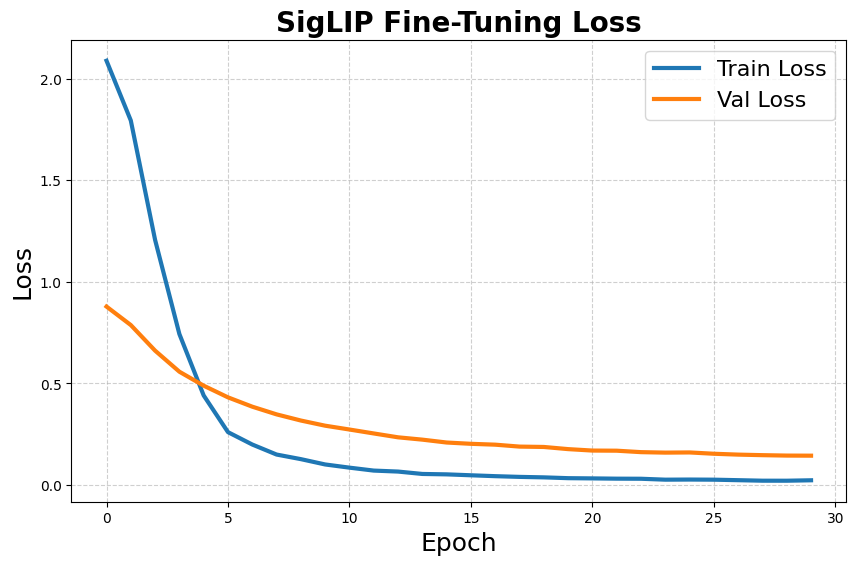

In [ ]:
#plot validation and training loss over epochs

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', linewidth=3)
plt.plot(val_losses, label='Val Loss',linewidth=3)

plt.title("SigLIP Fine-Tuning Loss", fontsize=20, fontweight='bold')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=16)

# SAVE PLOT
plt.savefig("/content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_loss_plot.png",
            dpi=300, bbox_inches='tight')
plt.show()



<h2> 5. Visualization of Output Embeddings </h2>

In [ ]:

#Reload the saved best checkpoint
checkpoint_path = "/content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/siglip_vitb16_v1_best.pt"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))


<All keys matched successfully>

In [ ]:
# sample 100 items from the first 8 product_type for visualization

first8_types = val_df["product_type_text"].unique()[:8]
df_first8 = val_df[val_df["product_type_text"].isin(first8_types)]


num_samples_total = 800
num_product_type = len(first8_types)
samples_per_class = num_samples_total // num_product_type

sample_df = (
    df_first8
    .groupby("product_type_text", group_keys=False)
    .apply(lambda x: x.sample(
        n=min(len(x), samples_per_class),
        random_state=42
    ))
    .reset_index(drop=True)
)


/tmp/ipython-input-2485657520.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(


In [ ]:
#
# Extract embeddings + prepare labels for TSNE
#
import torch
from PIL import Image
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def extract_embeddings(
        df,
        model,
        tokenizer,
        preprocess,
        device,
        image_col="full_path",
        text_col="full_text",
        label_col="product_type_text"
    ):

    model.eval()

    image_embeddings = []
    text_embeddings = []
    labels = []

    with torch.no_grad():
        for _, row in df.iterrows():
            # Process Image
            img = Image.open(row[image_col]).convert("RGB")
            img_tensor = preprocess(img).unsqueeze(0).to(device)
            img_feat = model.encode_image(img_tensor)
            img_feat = img_feat / img_feat.norm(dim=-1, keepdim=True)

            # Process Text
            txt_tensor = tokenizer([row[text_col]]).to(device)
            txt_feat = model.encode_text(txt_tensor)
            txt_feat = txt_feat / txt_feat.norm(dim=-1, keepdim=True)

            # Store embeddings
            image_embeddings.append(img_feat.cpu().numpy()[0])
            text_embeddings.append(txt_feat.cpu().numpy()[0])
            labels.append(row[label_col])

    # Convert lists to numpy arrays
    image_embeddings = np.vstack(image_embeddings)
    text_embeddings = np.vstack(text_embeddings)

    return image_embeddings, text_embeddings, labels


In [ ]:
# Plot a 3D t-SNE visualization of image and text embeddings
def plot_tsne_3d(all_embeddings, categories, modalities, title="3D t-SNE of Embeddings"):

    # Convert labels to NumPy arrays for masking
    categories = np.array(categories)
    modalities = np.array(modalities)

    # Assign a unique color to each product category
    unique_categories = sorted(set(categories))
    color_map = {cat: cm.tab10(i % 10) for i, cat in enumerate(unique_categories)}
    marker_map = {"image": "*", "text": "x"}

    # Run t-SNE to reduce embeddings to 3 dimensions
    tsne_3d = TSNE(
        n_components=3,
        perplexity=30,
        learning_rate=200,
        n_iter=1500,
        verbose=1,
        metric="cosine",
        random_state=0
    )
    tsne_result_3d = tsne_3d.fit_transform(all_embeddings)

    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot embeddings by category and modality
    for cat in unique_categories:
        for mod in ["image", "text"]:
            mask = (categories == cat) & (modalities == mod)
            if not np.any(mask):
                continue

            ax.scatter(
                tsne_result_3d[mask, 0],
                tsne_result_3d[mask, 1],
                tsne_result_3d[mask, 2],
                c=[color_map[cat]],
                marker=marker_map[mod],
                s=130 if mod == "image" else 100,
                alpha=0.85,
                label=f"{cat} ({mod})"
            )

    # Set plot title and axis labels
    ax.set_title(title, fontsize=20)
    ax.set_xlabel("TSNE-1")
    ax.set_ylabel("TSNE-2")
    ax.set_zlabel("TSNE-3")


    # Deduplicate legend entries
    handles, labels_uniq = ax.get_legend_handles_labels()
    uniq = dict(zip(labels_uniq, handles))
    ax.legend(uniq.values(), uniq.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1120 samples in 0.001s...
[t-SNE] Computed neighbors for 1120 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1120
[t-SNE] Computed conditional probabilities for sample 1120 / 1120
[t-SNE] Mean sigma: 0.152137
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.845963
[t-SNE] KL divergence after 1500 iterations: 0.450715


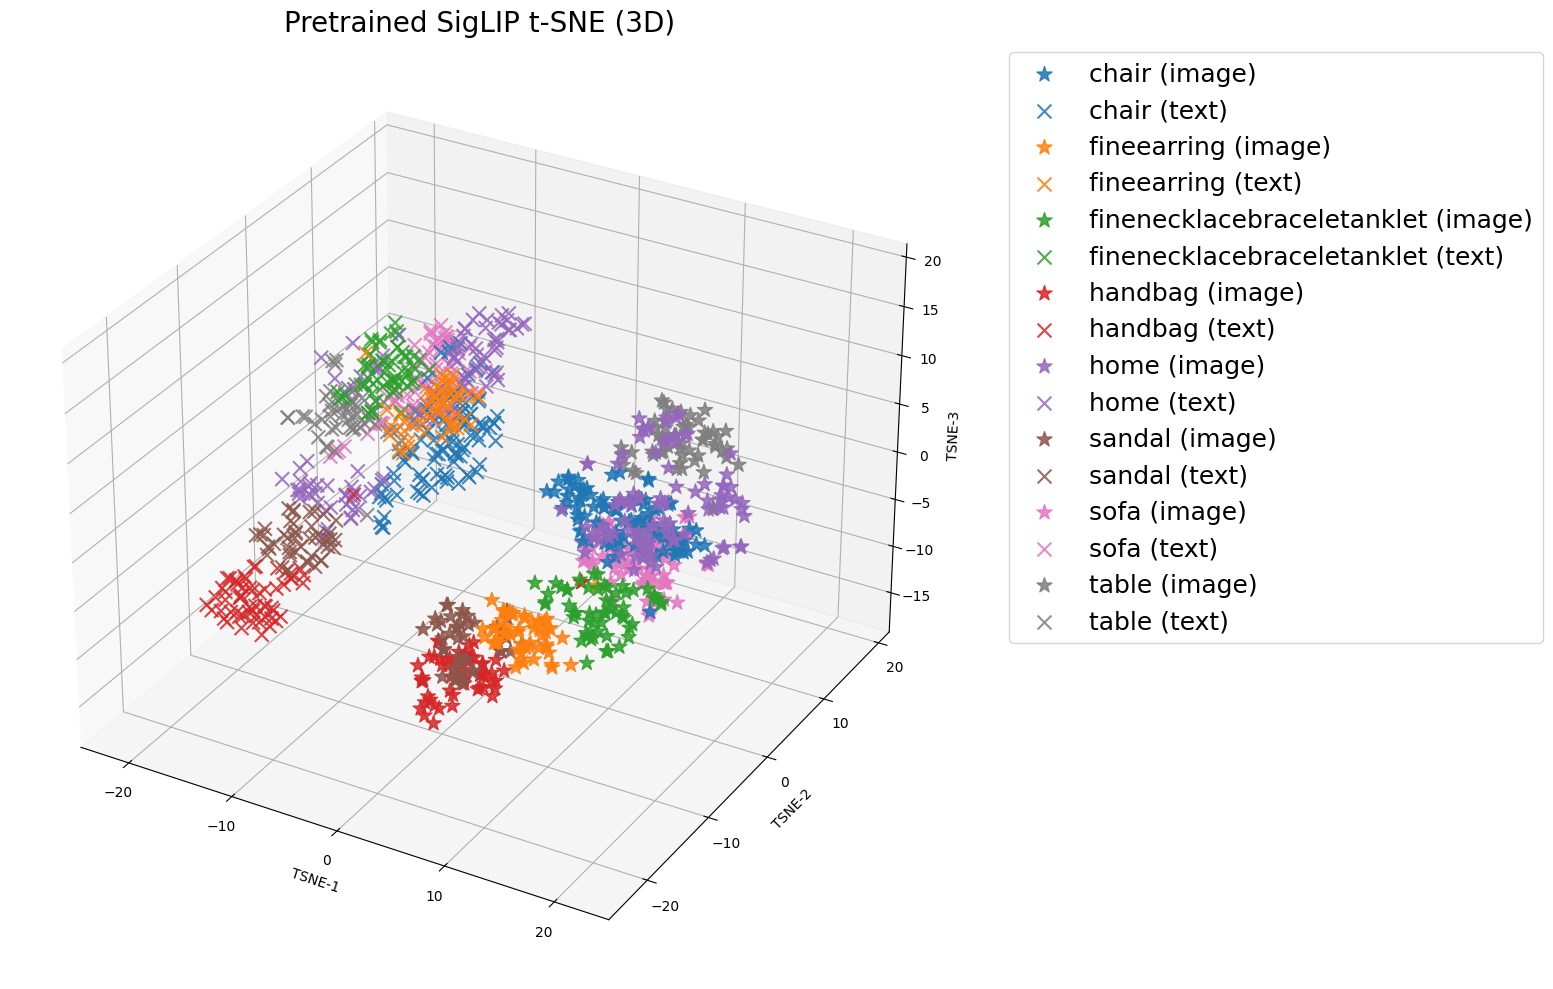

In [ ]:
# Load a pretrained SigLIP ViT-B/16 model and its image preprocessing pipeline
pretrained_model, _, pretrained_preprocess = open_clip.create_model_and_transforms(
    "ViT-B-16-SigLIP", pretrained="webli"
)
pretrained_model = pretrained_model.to(device)
pretrained_model.eval()

# Extract image and text embeddings from the pretrained model
image_emb_pre, text_emb_pre, labels_pre = extract_embeddings(
    df=sample_df,
    model=pretrained_model,
    tokenizer=tokenizer,
    preprocess=pretrained_preprocess,
    device=device
)

# Combine image and text embeddings for visualization
all_embeddings_pretrained = np.concatenate([image_emb_pre, text_emb_pre], axis=0)

# Duplicate labels and define modality types for each embedding
categories_pre = labels_pre + labels_pre
modalities_pre = ["image"] * len(labels_pre) + ["text"] * len(labels_pre)

# Visualize pretrained embeddings using 3D t-SNE
plot_tsne_3d(all_embeddings_pretrained, categories_pre, modalities_pre,
             title="Pretrained SigLIP t-SNE (3D)")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1120 samples in 0.001s...
[t-SNE] Computed neighbors for 1120 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1120
[t-SNE] Computed conditional probabilities for sample 1120 / 1120
[t-SNE] Mean sigma: 0.278857
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.903767
[t-SNE] KL divergence after 1450 iterations: 0.705599


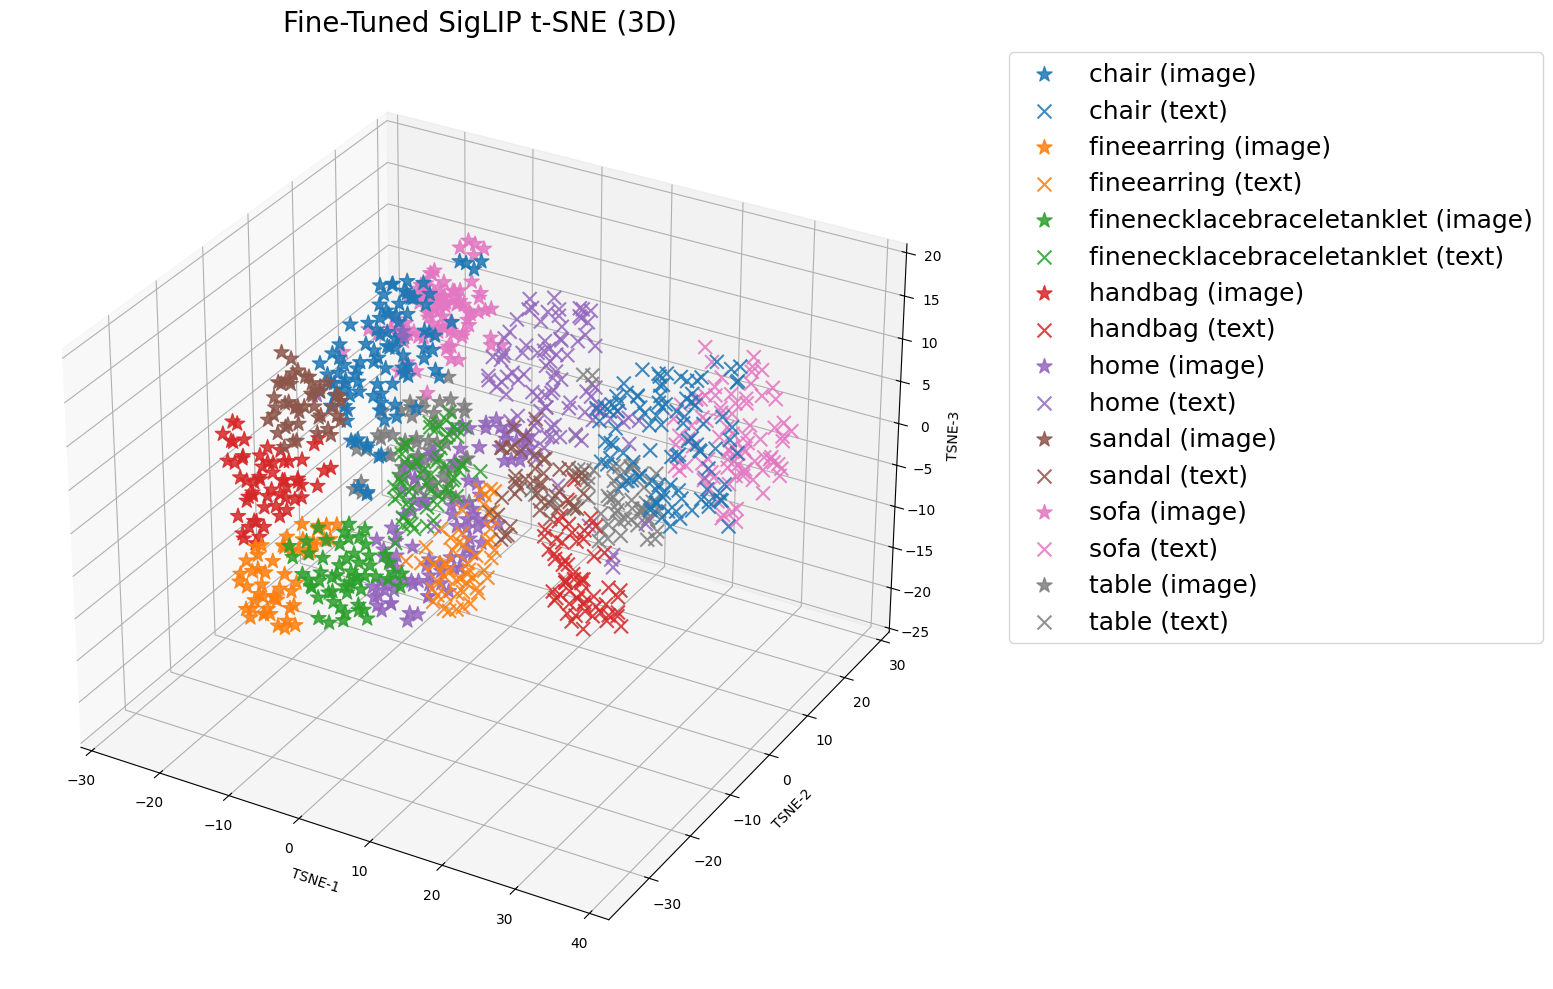

In [ ]:
# Extract image and text embeddings using the fine-tuned SigLIP model
image_emb_ft, text_emb_ft, labels_ft = extract_embeddings(
    df=sample_df,
    model=model,
    tokenizer=tokenizer,
    preprocess=val_preprocess,
    device=device
)
# Combine fine-tuned image and text embeddings for visualization
all_embeddings_finetuned = np.concatenate([image_emb_ft, text_emb_ft], axis=0)

# Duplicate labels and assign modality types
categories_ft = labels_ft + labels_ft
modalities_ft = ["image"] * len(labels_ft) + ["text"] * len(labels_ft)

# Visualize fine-tuned embeddings using 3D t-SNE
plot_tsne_3d(all_embeddings_finetuned, categories_ft, modalities_ft,
             title="Fine-Tuned SigLIP t-SNE (3D)")

<h2> 6. Metric Evaluation <h2>


In [ ]:

# Validation Set Retrieval Evaluation

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from PIL import Image
import torch



In [ ]:
#recall function
def recall_at_k(sims, k):
    ranks = np.argsort(-sims, axis=1)
    correct = np.arange(len(sims))
    hits = [correct[i] in ranks[i, :k] for i in range(len(sims))]
    return np.mean(hits)


In [ ]:
#MRR function
def mean_reciprocal_rank(sims):
    ranks = np.argsort(-sims, axis=1)
    correct = np.arange(len(sims))
    reciprocal_ranks = []

    for i in range(len(sims)):
        rank_list = ranks[i]
        pos = np.where(rank_list == i)[0][0]   # index of the correct match
        reciprocal_ranks.append(1.0 / (pos + 1))

    return np.mean(reciprocal_ranks)



In [ ]:

#metric evaluation function
def evaluate_retrieval(
        df,
        model,
        tokenizer,
        preprocess,
        device="cuda",
        name="MODEL"
    ):
    print(f"\n====== Evaluating Retrieval for {name} ======\n")

    # extract embeddings (3 outputs) ----
    img_embeds, txt_embeds, _labels = extract_embeddings(
        df=df,
        model=model,
        tokenizer=tokenizer,
        preprocess=preprocess,
        device=device
    )

    # compute similarity ----
    sims_t2i = cosine_similarity(txt_embeds,img_embeds)


    # compute metrics ----
    metrics = {
        "t2i_R@1": recall_at_k(sims_t2i, 1),
        "t2i_R@3": recall_at_k(sims_t2i, 3),
        "t2i_MRR": mean_reciprocal_rank(sims_t2i),
    }

    # ---- Step 4: pretty print ----
    print("Text -> Image Retrieval:")
    print(f"  R@1: {metrics['t2i_R@1']:.4f}")
    print(f"  R@3: {metrics['t2i_R@3']:.4f}")
    print(f"  MRR: {metrics['t2i_MRR']:.4f}\n")

    print("\n==========================================\n")

    return metrics


In [ ]:
# call metric evaluation function on the pretrained model
metrics_pretrained = evaluate_retrieval(
    test_df,
    pretrained_model,
    tokenizer,
    pretrained_preprocess,
    device="cuda",
    name="Pretrained SigLIP"
)



====== Evaluating Retrieval for Pretrained SigLIP ======

Text -> Image Retrieval:
  R@1: 0.6183
  R@3: 0.8145
  MRR: 0.7320





In [ ]:
# metric evaluation on the fine-tuned model
metrics_finetuned = evaluate_retrieval(
    test_df,
    model,
    tokenizer,
    preprocess,
    device="cuda",
    name="Fine-Tuned SigLIP"
)



====== Evaluating Retrieval for Fine-Tuned SigLIP ======

Text -> Image Retrieval:
  R@1: 0.7697
  R@3: 0.9471
  MRR: 0.8608





<h2> 7. Build Faiss Index and Retrieval </h2>

In [ ]:
# Install FAISS for fast nearest-neighbor search
!pip install faiss-cpu
import faiss


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.1 MB/s eta 0:00:00


In [ ]:
# ************************************************************
# Do not run the code
# ************************************************************

# index the preprocessing dataset df_final
index_df = df_final.reset_index(drop=True)

# Reuse extract_embeddings function
image_embeds, text_embeds, labels = extract_embeddings(
    df=index_df,
    model=model,
    tokenizer=tokenizer,
    preprocess=val_preprocess,
    device="cuda"
)

# convert the fine-tuned embeddings to float32
image_embeds = image_embeds.astype("float32")
text_embeds  = text_embeds.astype("float32")
dim = image_embeds.shape[1]

# Build FAISS indexes
# Image index
index_image = faiss.IndexFlatIP(dim)
# Text index
index_text  = faiss.IndexFlatIP(dim)

# Add embeddings
index_image.add(image_embeds)
index_text.add(text_embeds)

print("Image index size:", index_image.ntotal)
print("Text index size:", index_text.ntotal)

# Keep metadata aligned with rows
index_meta = index_df.reset_index(drop=True)[[
    "item_id",
    "image_id",
    "product_type_text",
    "full_path",
    "full_text"
]]


Image index size: 11152
Text index size: 11152


In [ ]:
# ************************************************************
# Do not run the code
# ************************************************************

# Directory to store FAISS
faiss_dir = os.path.join(save_dir, "faiss_indexes")
os.makedirs(faiss_dir, exist_ok=True)

# Save FAISS indexes
image_index_path = os.path.join(faiss_dir, "siglip_image.index")
text_index_path  = os.path.join(faiss_dir, "siglip_text.index")
faiss.write_index(index_image, image_index_path)
faiss.write_index(index_text,  text_index_path)

# Save metadata table (so we can map FAISS ids back to products) ----
meta_path = os.path.join(faiss_dir, "index_meta.parquet")
index_meta.to_parquet(meta_path, index=False)


In [ ]:

import faiss
import pandas as pd
import os

# Define directory where FAISS indexes and metadata are stored
save_dir = "/content/drive/MyDrive/IST_691_Project/SigLip_ABO_full_Checkpoints/faiss_indexes/"

# Set file paths for image index, text index, and associated metadata
image_index_path = os.path.join(save_dir, "siglip_image.index")
text_index_path  = os.path.join(save_dir, "siglip_text.index")
meta_path        = os.path.join(save_dir, "index_meta.parquet")

# Load FAISS indexes for image and text embeddings
index_image = faiss.read_index(image_index_path)
index_text  = faiss.read_index(text_index_path)

# Load metadata mapping FAISS index positions to product information
index_meta = pd.read_parquet(meta_path)



In [ ]:
# Perform text retrieval using a FAISS index and the fine-tuned SigLIP model
def search_by_text(
        query_text,
        model,
        tokenizer,
        preprocess,
        faiss_index,
        meta_df,
        device="cuda",
        top_k=3
    ):

    model.eval()

    # Encode the input text query into a normalized embedding
    with torch.no_grad(), torch.amp.autocast("cuda"):
        tokens = tokenizer([query_text]).to(device)
        txt_feat = model.encode_text(tokens)
        txt_feat = txt_feat / txt_feat.norm(dim=-1, keepdim=True)

    # Convert embedding to NumPy format for FAISS
    q = txt_feat.cpu().numpy().astype("float32")

    # Search the FAISS index for the top-k most similar items
    scores, indices = faiss_index.search(q, top_k)

    # Retrieve corresponding metadata and similarity score
    idxs = indices[0]
    sims = scores[0]
    results = meta_df.iloc[idxs].copy()
    results["score"] = sims

    return results.reset_index(drop=True)



In [ ]:
# Perform image retrieval using a FAISS index
def search_by_image(
        image_path,
        model,
        preprocess,
        faiss_index,
        meta_df,
        device="cuda",
        top_k=3
    ):

    model.eval()

    # Load and preprocess the input image
    img = Image.open(image_path).convert("RGB")
    img_tensor = preprocess(img).unsqueeze(0).to(device)

    # Encode the image into a normalized embedding
    with torch.no_grad(), torch.amp.autocast("cuda"):
        img_feat = model.encode_image(img_tensor)
        img_feat = img_feat / img_feat.norm(dim=-1, keepdim=True)

    # Convert embedding to NumPy format for FAISS
    q = img_feat.cpu().numpy().astype("float32")

    # Search the FAISS index for the top-k most similar items
    scores, indices = faiss_index.search(q, top_k)

     # Retrieve corresponding metadata and similarity scores
    idxs = indices[0]
    sims = scores[0]
    results = meta_df.iloc[idxs].copy()
    results["score"] = sims

    return results.reset_index(drop=True)




In [ ]:

import matplotlib.pyplot as plt
from PIL import Image
import os
import textwrap


# Truncate long text descriptions to a fixed number of words (optional)
def truncate_text(text, n_words):
    if not isinstance(text, str):
        return ""
    words = text.split()
    if len(words) <= n_words:
        return text
    return " ".join(words[:n_words]) + " ..."

# Display the top-3 retrieved products with images and short captions
def show_top3_products(query_desc, results_df):
    results_df = results_df.head(3)

    fig, axes = plt.subplots(1, len(results_df), figsize=(10, 4))

    for ax, row in zip(axes, results_df.itertuples()):
        img = Image.open(row.full_path).convert("RGB")
        ax.imshow(img)
        ax.axis("off")

        short_text = truncate_text(row.full_text, 10)
        caption = (
            f"{row.item_id}\n"
            f"{row.product_type_text}\n"
            f"score={row.score:.2f}\n\n"
            f"{textwrap.fill(short_text, width=25)}"
        )

        ax.text(
            0.5, -0.15,
            caption,
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=15
        )

    plt.tight_layout()
    plt.show()


***************************************************************************
Search for: modern gray fabric sofa for living room
***************************************************************************


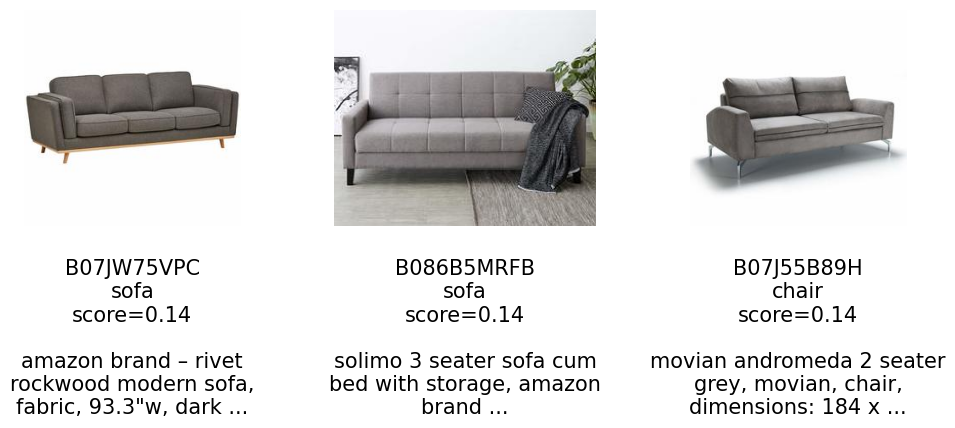

In [ ]:

search_text = "modern gray fabric sofa for living room"

print("***************************************************************************")
print("Search for:", search_text)
print("***************************************************************************")

# Perform product retrieval using text queries
results_text = search_by_text(
    query_text=search_text,
    model=model,                # fine-tuned SigLIP
    tokenizer=tokenizer,
    preprocess=val_preprocess,
    faiss_index=index_image,
    meta_df=index_meta,
    top_k=3
)

show_top3_products(search_text, results_text)

***************************************************************************
Search for:


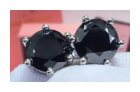

***************************************************************************


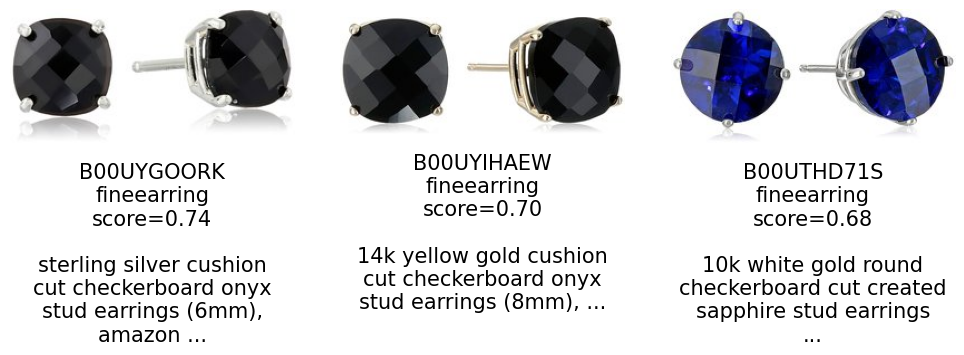

In [ ]:

from google.colab import files
import os

# Upload a product image
query_image_path = "/content/earrings.jpg"

print("***************************************************************************")
print("Search for:")
img = Image.open(query_image_path).convert("RGB")
plt.figure(figsize=(1.5, 1.5))   # small figure
plt.imshow(img)
plt.axis("off")
plt.tight_layout()
plt.show()
print("***************************************************************************")

# Perform product retrieval using image queries
results_img = search_by_image(
    image_path=query_image_path,
    model=model,
    preprocess=val_preprocess,
    faiss_index=index_image,
    meta_df=index_meta,
    top_k=3
)

show_top3_products(f"Search for: {os.path.basename(query_image_path)} \n", results_img)
